## Importieren der wichtigsten Packages

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp, pow, sqrt, log
import seaborn as sns #spezielle Graphikdarstellungen
from mpl_toolkits.mplot3d import Axes3D

# Beginner
# https://matplotlib.org/gallery.html
# http://seaborn.pydata.org/
# Expert:
# https://altair-viz.github.io/ für deklarative Visualisierungen
# https://d3js.org/ 
# https://docs.bokeh.org/en/latest/

## Plot, Scatter und Subplot
- Größe der Grafik anpassen
- Layout anpassen
- Titel der Grafik
- Legende hinzufügen
- Achsenbeschriftungen

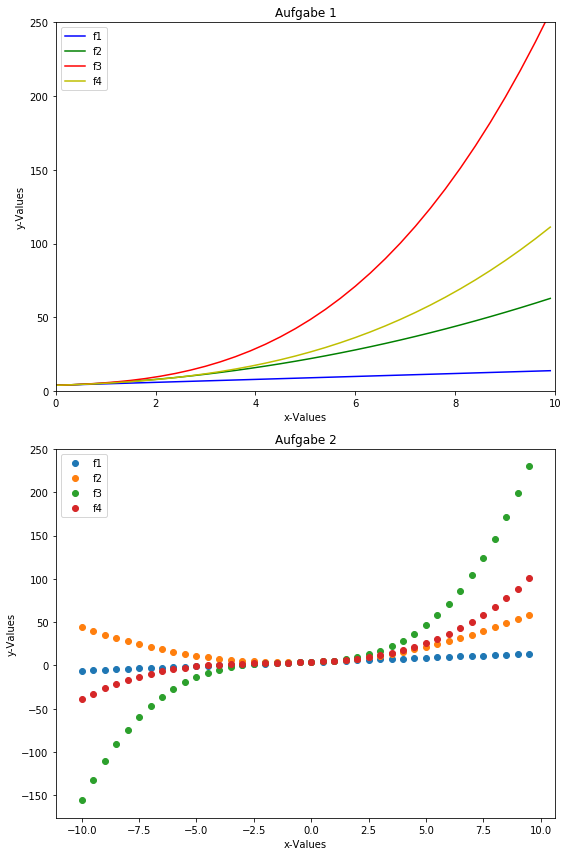

In [28]:
def f1(x):
    return 4+x
def f2(x):
    return 4+x+0.5*x**2
def f3(x):
    return 4+x+0.5*x**2+0.2*x**3
def f4(x):
    return 1/3*(f1(x)+f2(x)+f3(x))
t1 = np.arange(0.0, 10.0, 0.3) #x-Werte

plt.figure(figsize=(8,12))
# Darstellung aller Plots in der Grafik/Figure (BreitexHöhe)

plt.subplot(211)
# 1. Zahl: Zahl der Zeilen
# 2. Zahl: Zahl der Spalten
# 3. Zahl: Stelle des Plots in der Grafik
plt.axis([0, 10, 0, 250])
# ändert die Anzeige der X- und Y-Achse
plt.plot(t1,f1(t1), 'b', label="f1");
plt.plot(t1,f2(t1), 'g', label="f2");
plt.plot(t1,f3(t1), 'r', label="f3");
plt.plot(t1,f4(t1), 'y', label="f4");

#Legende und weiter Beschriftungen:
plt.title('Aufgabe 1');
plt.legend(loc='upper left');
plt.xlabel('x-Values'); #Beschriftung x-Achse
plt.ylabel('y-Values'); #Beschriftung y-Achse 

x = np.arange(-10,10,0.5)

plt.subplot(212)
plt.scatter(x,f1(x), label="f1")
plt.scatter(x,f2(x), label="f2")
plt.scatter(x,f3(x), label="f3")
plt.scatter(x,f4(x), label="f4")

#Legende und weiter Beschriftungen:
plt.title('Aufgabe 2');
plt.legend(loc='upper left');
plt.xlabel('x-Values'); #Beschriftung x-Achse
plt.ylabel('y-Values'); #Beschriftung y-Achse 

plt.tight_layout(); # um Überschneidungen zu vermeiden

## Contour-Plot
hier muss Z immer das Ergebnis von X und Y sein ob multipliziert oder addiert oder ähnliches.

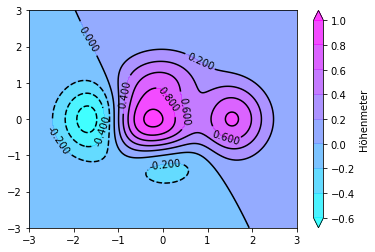

In [87]:
def f(x,y):
    return (1 - x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256 #Anzahl der Punkte
x = np.linspace(-3,3,n) # x-Werte 
y = np.linspace(-3,3,n) # y-Werte
# x und y jeweils eine Liste von Werten

X, Y = np.meshgrid(x, y)
#alle möglichen Tupel in eine Liste/Matrix
#jeder wert von x hat 256 zugehörige y Werte und umgekehrt

C1 = plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='cool', extend='both');
# contourfigure braucht man für die colorbar

C2 = plt.contour(X, Y, f(X, Y), 8, colors='black');
#verdeutlicht bzw. zeichnet konstante Z Werte nach

plt.clabel(C2);
#beschriftet konstante Z Werte

cbar = plt.colorbar(C1);
cbar.ax.set_ylabel('Höhenmeter');


## 3D Plots

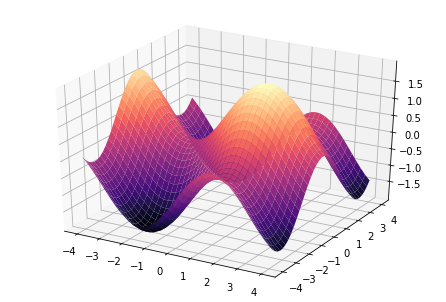

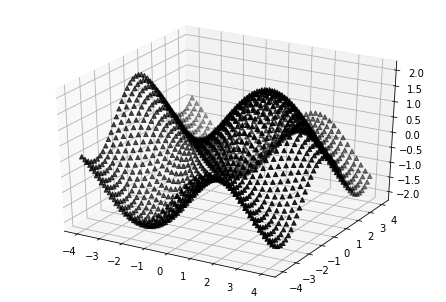

In [130]:
def f1(x,y):
    return np.sin(x)+np.cos(y)

X = np.linspace(-4, 4, 40)
Y = np.linspace(-4, 4, 40) 
X, Y = np.meshgrid(X, Y)

fig = plt.figure()
ax = Axes3D(fig)
# vorherigen zwei Zeilen zeigen neue Grafik an
ax.plot_surface(X, Y, f1(X,Y), rstride=1, cstride=1, cmap='magma');

fig = plt.figure()
ax = Axes3D(fig)
# ohne as wird beides in einer Grafik gezeichnet
ax.scatter(X, Y, f1(X,Y), c='black', marker = "^");

## Pairplot und Histogramm

C:\Users\pafal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

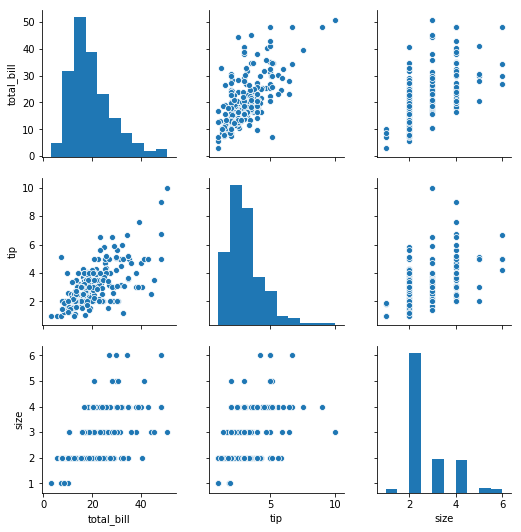

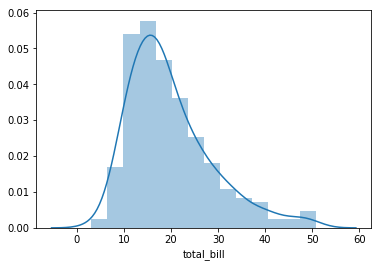

In [4]:
TipsData = pd.read_csv("tips.csv")

fig1 = plt.figure();
sns.pairplot(TipsData);

fig2 = plt.figure();
sns.distplot(TipsData['total_bill']);

## Boxplot
zur visualisierung von nicht numerischen Daten

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


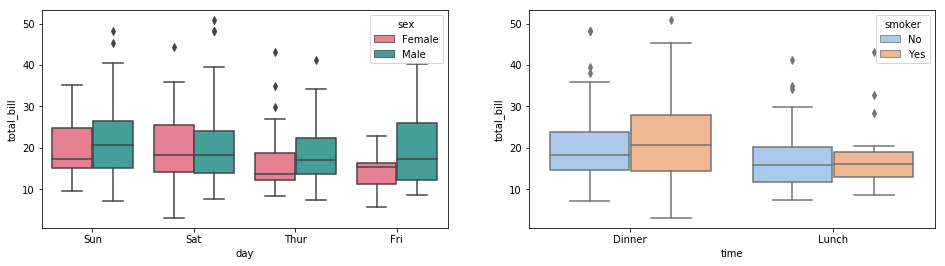

In [30]:
plt.figure(figsize=(16, 4))

fig1 = plt.subplot(121)
sns.boxplot(x="day", y="total_bill", hue="sex", data=TipsData, palette="husl");

fig2 = plt.subplot(122)
sns.boxplot(x="time", y="total_bill", hue="smoker", data=TipsData, palette="pastel");
TipsData.head()

## Pie-Chart

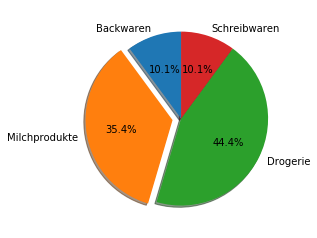

In [186]:
labels = "Backwaren", "Milchprodukte", "Drogerie", "Schreibwaren"
sizes = [10, 35, 44, 10]
explode = (0, 0.1, 0, 0)

# fig1, ax1 = plt.subplots()
# lässt die plots einfach untereinander erscheinen
plt.pie(sizes, explode=explode, labels=labels, shadow = True, autopct="%1.1f%%", startangle = 90);
# ax1.axis("equal");
# soll anscheinend gewährleisten, dass es ein Kreis ist?

## Balkendiagramm

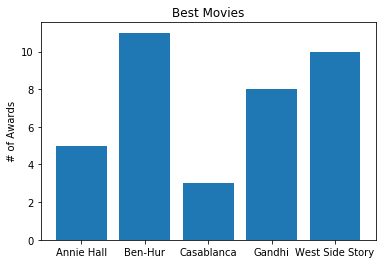

In [22]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

plt.bar((range(len(movies))), num_oscars);
# zuerst wieviele balken, dann was in die Balken rein kommt

plt.title("Best Movies")
plt.ylabel("# of Awards")

plt.xticks(range(len(movies)), movies);

SyntaxError: invalid syntax (<ipython-input-37-cc2aba7668ae>, line 1)